### -- Import required packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import datetime as dt

###  -- Retrieve raw data

In [3]:
# Charger le fichier CSV
file_path = 'World-Stock-Prices-Dataset.csv'
data = pd.read_csv(file_path)


In [4]:
print("\n**************** data overview ******** \n")
print(data.info())



**************** data overview ******** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279753 entries, 0 to 279752
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          279753 non-null  object 
 1   Open          279753 non-null  float64
 2   High          279753 non-null  float64
 3   Low           279753 non-null  float64
 4   Close         279753 non-null  float64
 5   Volume        279753 non-null  float64
 6   Dividends     279753 non-null  float64
 7   Stock Splits  279753 non-null  float64
 8   Brand_Name    279753 non-null  object 
 9   Ticker        279753 non-null  object 
 10  Industry_Tag  279753 non-null  object 
 11  Country       279753 non-null  object 
dtypes: float64(7), object(5)
memory usage: 25.6+ MB
None


### -- Preprocessing data

In [5]:
# Filtrer les données pour ne garder que celles d'Apple
apple_df = data[data['Brand_Name'] == 'apple']

# Sélectionner uniquement la colonne 'Close' et convertir la colonne 'Date'
apple_close_df = apple_df[['Date', 'Close']]


In [6]:
apple_close = apple_close_df.copy()

# Assurez que la colonne de dates est au format datetime
apple_close['Date'] = pd.to_datetime(apple_close['Date'].str.split(" ").str[0])

# Trier le DataFrame 'apple_close' par la colonne 'Date'
apple_close = apple_close.sort_values('Date')


In [7]:
print("\n**************** data overview ******** \n")
print(apple_close.info())



**************** data overview ******** 

<class 'pandas.core.frame.DataFrame'>
Index: 5969 entries, 19031 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5969 non-null   datetime64[ns]
 1   Close   5969 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 139.9 KB
None


In [8]:
apple_close.set_index('Date', inplace=True)

print("\n************ data overview ****** \n")
print(apple_close)


************ data overview ****** 

                 Close
Date                  
2000-01-03    0.848323
2000-01-04    0.776801
2000-01-05    0.788168
2000-01-06    0.719961
2000-01-07    0.754065
...                ...
2023-09-15  175.009995
2023-09-15  175.009995
2023-09-18  177.970001
2023-09-19  179.070007
2023-09-20  175.490005

[5969 rows x 1 columns]


In [9]:
# Vérifier et gérer les doublons (garder la première occurrence)
apple_close = apple_close[~apple_close.index.duplicated(keep='first')]

In [10]:
print("\n************ data overview ****** \n")
print(apple_close)


************ data overview ****** 

                 Close
Date                  
2000-01-03    0.848323
2000-01-04    0.776801
2000-01-05    0.788168
2000-01-06    0.719961
2000-01-07    0.754065
...                ...
2023-09-14  175.740005
2023-09-15  175.009995
2023-09-18  177.970001
2023-09-19  179.070007
2023-09-20  175.490005

[5966 rows x 1 columns]


In [11]:
ferq = 'Week'
apple_close = apple_close.resample('W').mean()

print("\n************ data overview ****** \n")
print(apple_close)


************ data overview ****** 

                 Close
Date                  
2000-01-09    0.777464
2000-01-16    0.719772
2000-01-23    0.824758
2000-01-30    0.818956
2000-02-06    0.779263
...                ...
2023-08-27  177.835999
2023-09-03  185.857999
2023-09-10  182.087498
2023-09-17  176.080002
2023-09-24  177.510005

[1238 rows x 1 columns]


In [12]:
apple_close = apple_close[apple_close.index >= "2018-09-15"]

In [13]:
apple_close.index

DatetimeIndex(['2018-09-16', '2018-09-23', '2018-09-30', '2018-10-07',
               '2018-10-14', '2018-10-21', '2018-10-28', '2018-11-04',
               '2018-11-11', '2018-11-18',
               ...
               '2023-07-23', '2023-07-30', '2023-08-06', '2023-08-13',
               '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10',
               '2023-09-17', '2023-09-24'],
              dtype='datetime64[ns]', name='Date', length=263, freq='W-SUN')

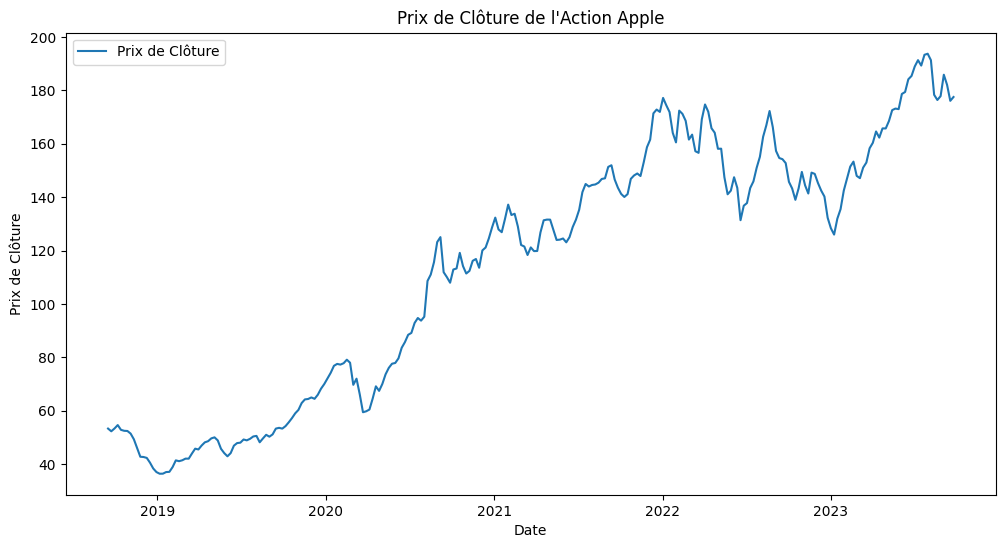

In [14]:
# Visualisation des données après la gestion des doublons et des valeurs manquantes
plt.figure(figsize=(12, 6))
plt.plot(apple_close, label='Prix de Clôture')
plt.title('Prix de Clôture de l\'Action Apple')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()
plt.show()

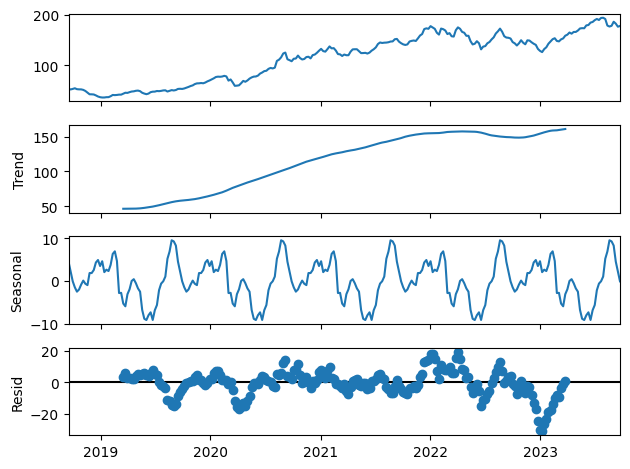

In [15]:
# Décomposition saisonnière pour observer le trend et la saisonnalité
decomposition = sm.tsa.seasonal_decompose(apple_close, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
# Test ADF
adf_test = adfuller(apple_close['Close'])
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p_value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value

# Afficher les résultats du test ADF
print(adf_output)
# Displaying if the series is stationary or not
p_value = adf_test[1]
if p_value <0.05:
    print("\n===> The original time serie is stationary.")
else:
    print("\n===> The original time serie is not stationary .")

Test Statistic                  -0.836318
p_value                          0.808221
#Lags Used                       1.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64

===> The original time serie is not stationary .


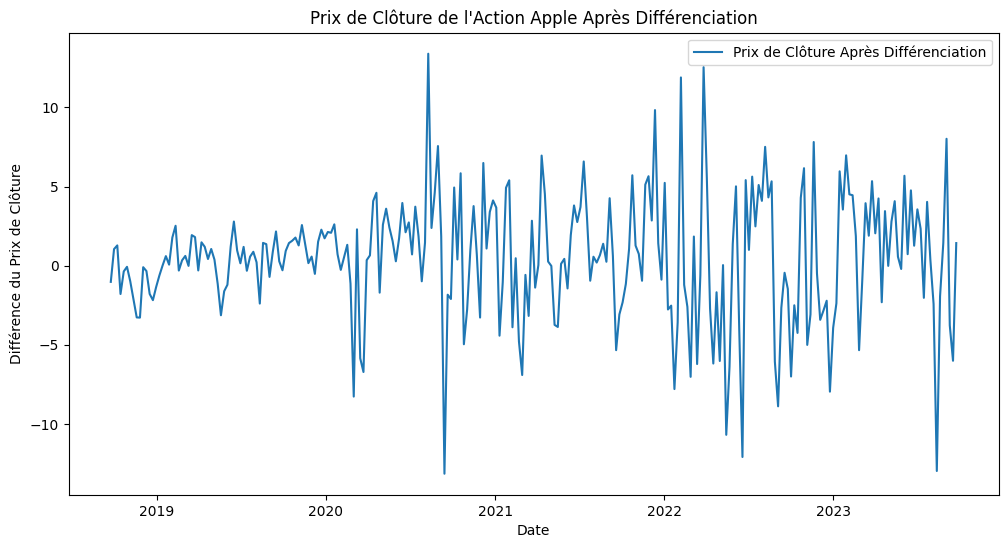

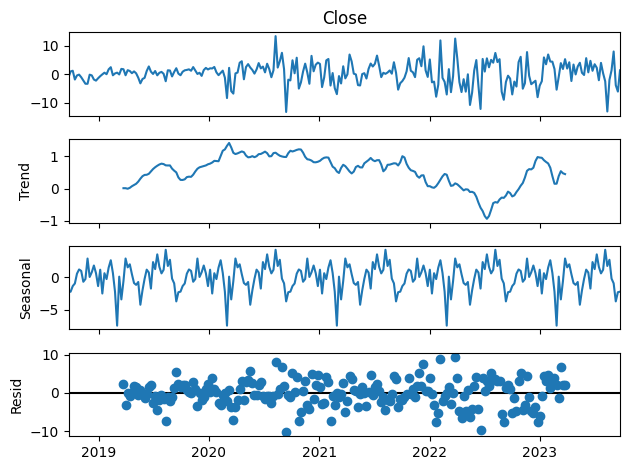

########################################### The time serie is stationary after 1_differenciation ###########################################.


C:\Users\AX2B\AppData\Local\Temp\ipykernel_25168\3346402839.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = adf_output_diff[1]


In [17]:
# Appliquer la différenciation
apple_diff = apple_close['Close'].diff().dropna()

# Visualisation des données différenciées
plt.figure(figsize=(12, 6))
plt.plot(apple_diff, label='Prix de Clôture Après Différenciation')
plt.title('Prix de Clôture de l\'Action Apple Après Différenciation')
plt.xlabel('Date')
plt.ylabel('Différence du Prix de Clôture')
plt.legend()
plt.show()

# Décomposition saisonnière des données différenciées
decomposition_diff = sm.tsa.seasonal_decompose(apple_diff, model='additive')
fig_diff = decomposition_diff.plot()
plt.show()

# Test ADF sur les données différenciées
adf_test_diff = adfuller(apple_diff)
adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_output_diff['Critical Value (%s)' % key] = value

# Afficher les résultats du test ADF sur les données différenciées
adf_output_diff
# Displaying if the series is stationary or not
p_value = adf_output_diff[1]
if p_value <0.05:
    print("########################################### The time serie is stationary after 1_differenciation ###########################################.")
else:
    print("########################################### The time serie still not stationary even after 1_differenciation  ###########################################.")

## Ajustement du modèle

In [18]:
# Calcul du nombre de points pour le test (20% des données)
n_test = int(len(apple_diff) * 0.20)

# Calcul du nombre de points pour l'entraînement (80% des données)
n_train = len(apple_diff) - n_test

# Diviser les données en ensembles de traitement et de test
train_df = apple_diff.iloc[:n_train]
test_df = apple_diff.iloc[-n_test:]


In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools

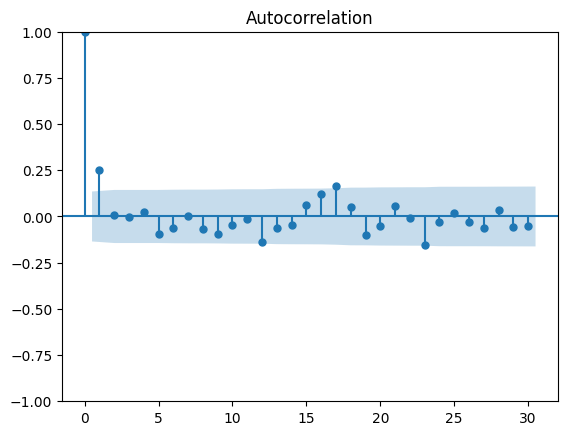

In [20]:
# Plot ACF
plot_acf(train_df, lags=30)
plt.show()

####################*Résultats pour l'odre MA q = 1
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -569.722
Date:                Wed, 29 Nov 2023   AIC                           1145.445
Time:                        17:30:22   BIC                           1155.486
Sample:                    09-23-2018   HQIC                          1149.504
                         - 09-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4693      0.318      1.474      0.140      -0.155       1.093
ma.L1          0.2623      0.061      4.277      0.000       0.142       0.382


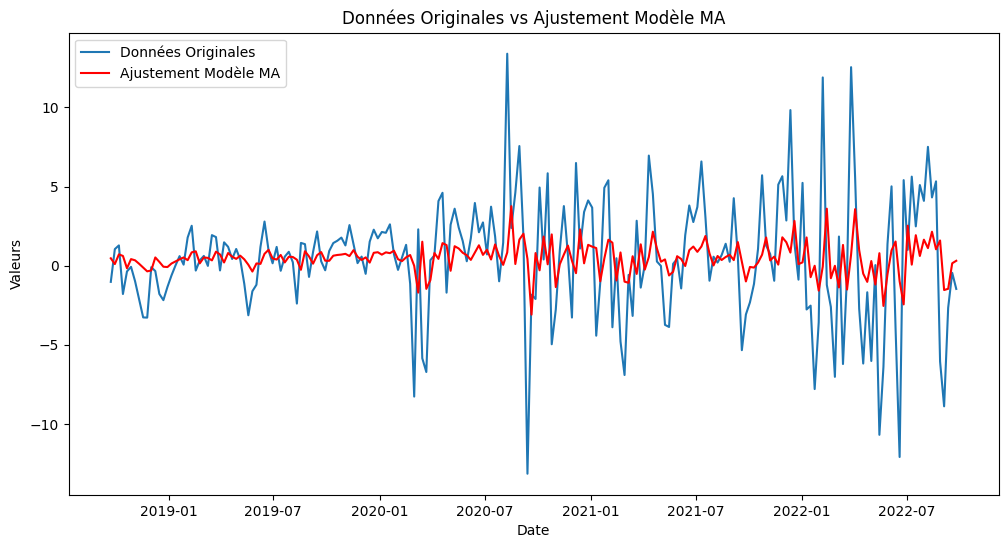

####################*Résultats pour l'odre MA q = 12
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                ARIMA(0, 0, 12)   Log Likelihood                -565.377
Date:                Wed, 29 Nov 2023   AIC                           1158.753
Time:                        17:30:25   BIC                           1205.613
Sample:                    09-23-2018   HQIC                          1177.697
                         - 09-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5040      0.243      2.073      0.038       0.027       0.981
ma.L1          0.2651      0.077      3.458      0.001       0.115       0.415

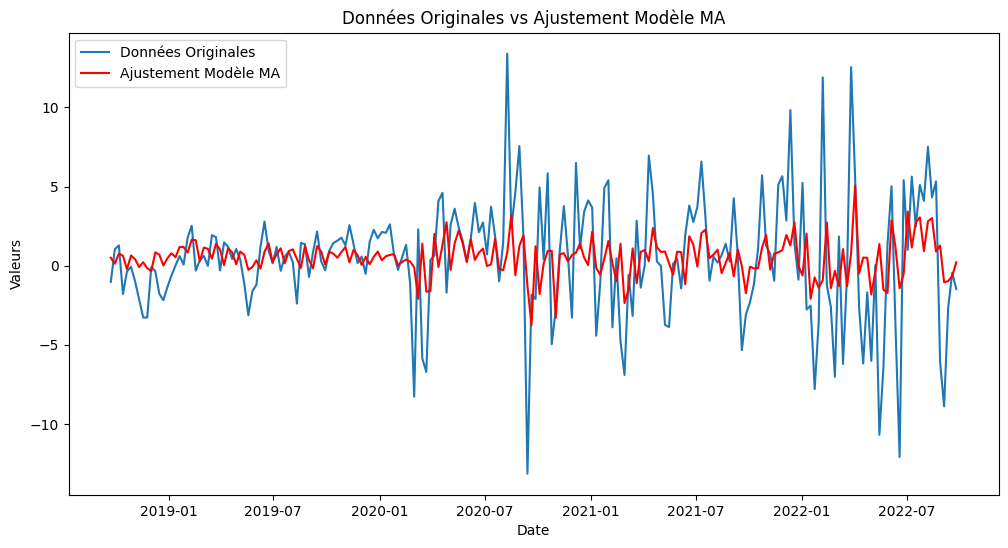

####################*Résultats pour l'odre MA q = 17
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                ARIMA(0, 0, 17)   Log Likelihood                -561.261
Date:                Wed, 29 Nov 2023   AIC                           1160.521
Time:                        17:30:27   BIC                           1224.116
Sample:                    09-23-2018   HQIC                          1186.231
                         - 09-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4706      0.277      1.697      0.090      -0.073       1.014
ma.L1          0.2348      0.077      3.054      0.002       0.084       0.385

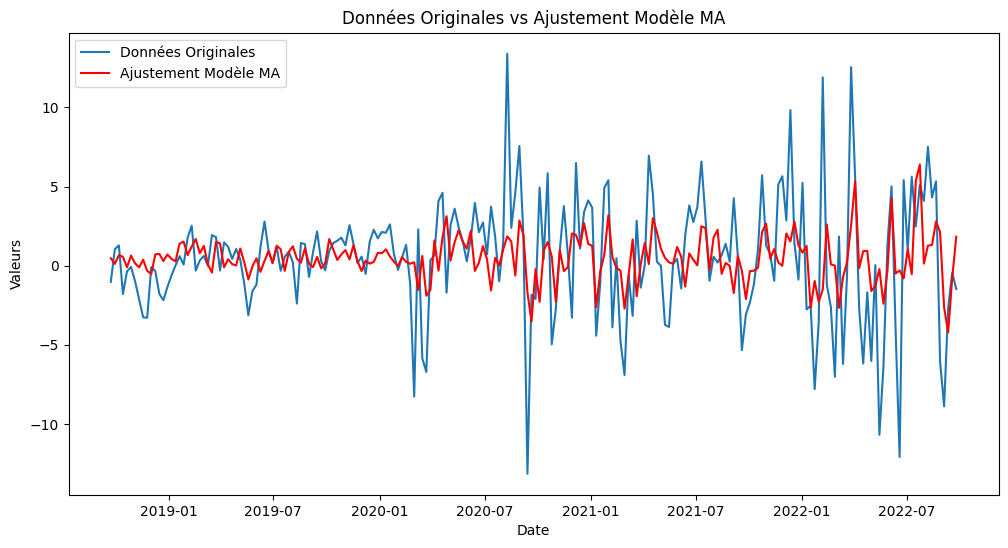

####################*Résultats pour l'odre MA q = 23


C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                ARIMA(0, 0, 23)   Log Likelihood                -556.934
Date:                Wed, 29 Nov 2023   AIC                           1163.869
Time:                        17:30:36   BIC                           1247.547
Sample:                    09-23-2018   HQIC                          1197.697
                         - 09-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4939      0.291      1.698      0.089      -0.076       1.064
ma.L1          0.2408      0.076      3.189      0.001       0.093       0.389
ma.L2          0.0592      0.090      0.658      0.5

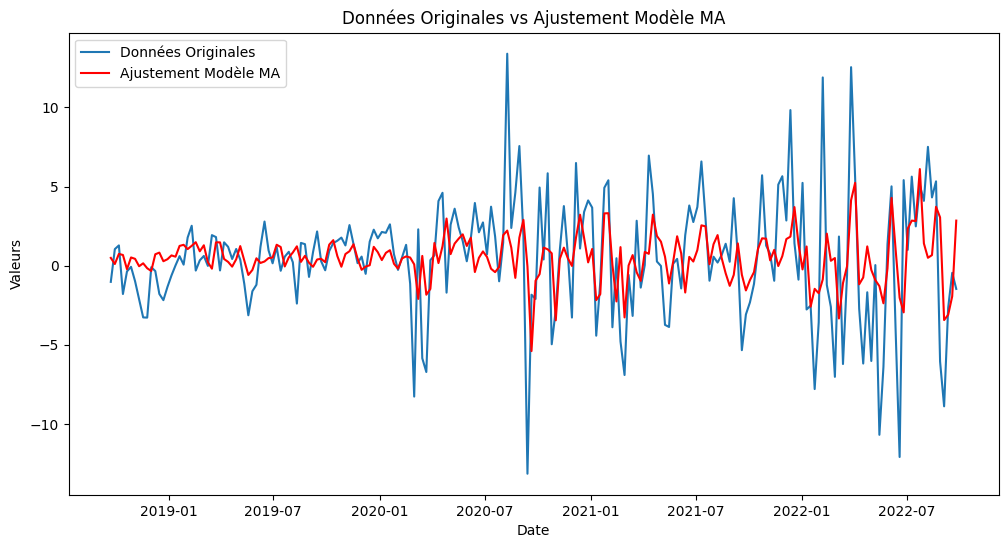

In [21]:
# Ajuster le modèle MA en utilisant un ordre choisi basé sur l'ACF
MA_Order = [1, 12, 17, 23]
aic_values = {}
for q in MA_Order :
        print("####################*Résultats pour l'odre MA q =", q)
        model_ma = ARIMA(train_df, order=(0, 0, q))
        results_ma = model_ma.fit()
        
        # Afficher le résumé du modèle
        print(results_ma.summary())
        # Stocker la valeur AIC
        aic_values[q] = results_ma.aic
        # Récupérer les ajustements du modèle
        fitted_values_ma = results_ma.fittedvalues
        
        # Créer le graphique des données et de l'ajustement
        plt.figure(figsize=(12, 6))
        plt.plot(train_df, label='Données Originales')
        plt.plot(fitted_values_ma, color='red', label='Ajustement Modèle MA')
        plt.title('Données Originales vs Ajustement Modèle MA')
        plt.xlabel('Date')
        plt.ylabel('Valeurs')
        plt.legend()
        plt.show()

In [22]:
# Afficher les valeurs AIC pour chaque modèle
print("Valeurs AIC pour chaque ordre MA :")
for q, aic in aic_values.items():
    print(f"MA({q}): AIC = {aic}")

Valeurs AIC pour chaque ordre MA :
MA(1): AIC = 1145.4446466592008
MA(12): AIC = 1158.7533457734908
MA(17): AIC = 1160.5213907429666
MA(23): AIC = 1163.8689267459763


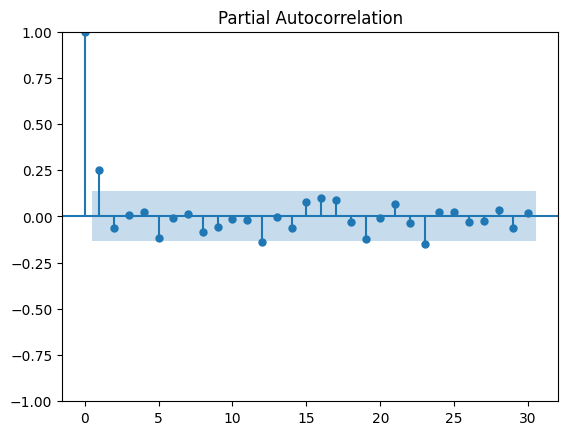

In [23]:
# Plot PACF pour déterminer l'ordre
plot_pacf(train_df, lags=30)
plt.show()

####################*Résultats pour l'odre AR p = 1
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -570.074
Date:                Wed, 29 Nov 2023   AIC                           1146.149
Time:                        17:30:37   BIC                           1156.190
Sample:                    09-23-2018   HQIC                          1150.208
                         - 09-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4679      0.341      1.372      0.170      -0.200       1.136
ar.L1          0.2521      0.065      3.898      0.000       0.125       0.379


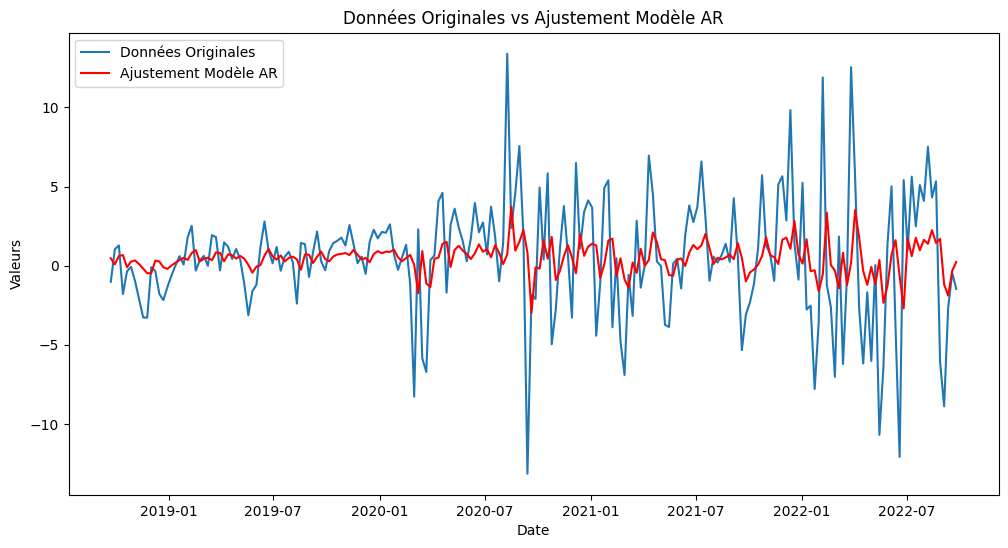

####################*Résultats pour l'odre AR p = 12
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                ARIMA(12, 0, 0)   Log Likelihood                -564.816
Date:                Wed, 29 Nov 2023   AIC                           1157.631
Time:                        17:30:39   BIC                           1204.491
Sample:                    09-23-2018   HQIC                          1176.575
                         - 09-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4911      0.245      2.005      0.045       0.011       0.971
ar.L1          0.2631      0.072      3.655      0.000       0.122       0.404

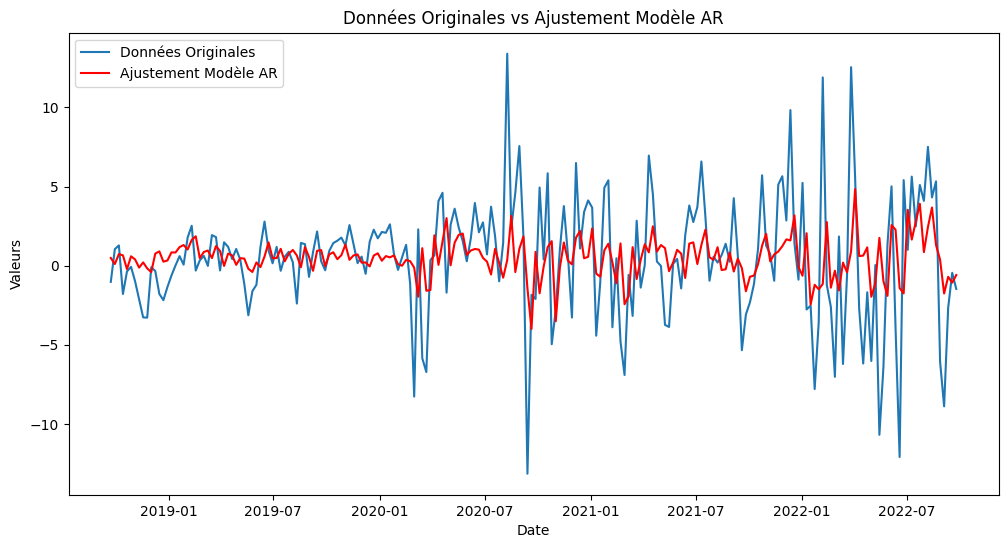

####################*Résultats pour l'odre AR p = 19
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                ARIMA(19, 0, 0)   Log Likelihood                -559.401
Date:                Wed, 29 Nov 2023   AIC                           1160.802
Time:                        17:30:41   BIC                           1231.091
Sample:                    09-23-2018   HQIC                          1189.217
                         - 09-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4796      0.279      1.717      0.086      -0.068       1.027
ar.L1          0.2460      0.078      3.156      0.002       0.093       0.399

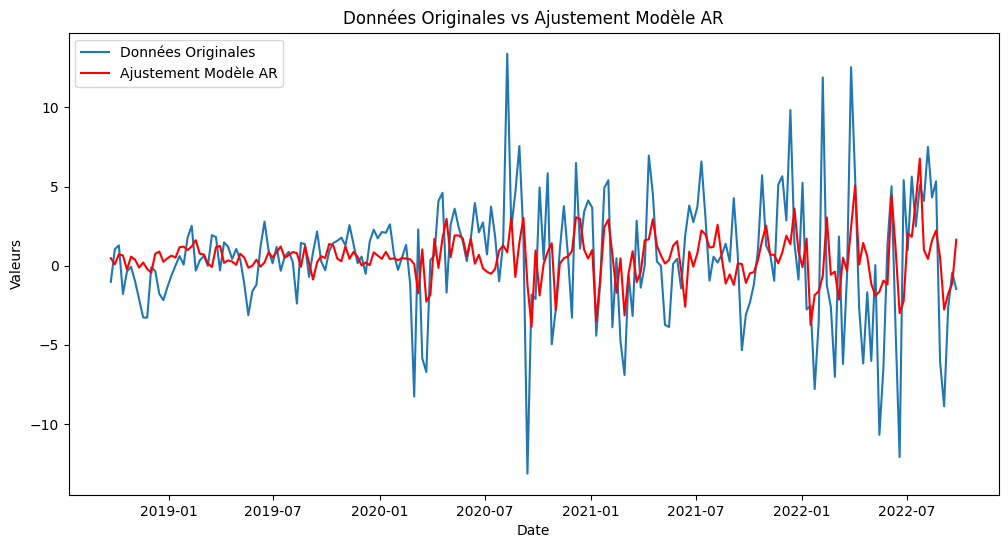

In [24]:
# Ajuster le modèle AR avec l'ordre choisi
AR_model = [1, 12, 19]
aic_values = {}
for p in  AR_model :
        print("####################*Résultats pour l'odre AR p =", p)
        model_ar = ARIMA(train_df, order=(p, 0, 0))
        results_ar = model_ar.fit()
        
        # Afficher le résumé du modèle
        print(results_ar.summary())
        # Stocker la valeur AIC
        aic_values[p] = results_ar.aic
        # Récupérer les ajustements du modèle
        fitted_values = results_ar.fittedvalues
        
        # Créer le graphique
        plt.figure(figsize=(12, 6))
        plt.plot(train_df, label='Données Originales')
        plt.plot(fitted_values, color='red', label='Ajustement Modèle AR')
        plt.title('Données Originales vs Ajustement Modèle AR')
        plt.xlabel('Date')
        plt.ylabel('Valeurs')
        plt.legend()
        plt.show()
     

In [25]:
# Afficher les valeurs AIC pour chaque modèle
print("Valeurs AIC pour chaque ordre AR :")
for p, aic in aic_values.items():
    print(f"AR({p}): AIC = {aic}")

Valeurs AIC pour chaque ordre AR :
AR(1): AIC = 1146.1486679428604
AR(12): AIC = 1157.631067515938
AR(19): AIC = 1160.8015049084506


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -569.691
Date:                Wed, 29 Nov 2023   AIC                           1147.383
Time:                        17:30:42   BIC                           1160.771
Sample:                    09-23-2018   HQIC                          1152.795
                         - 09-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4689      0.331      1.417      0.157      -0.180       1.118
ar.L1          0.0564      0.215      0.262      0.793      -0.365       0.478
ma.L1          0.2112      0.202      1.044      0.2

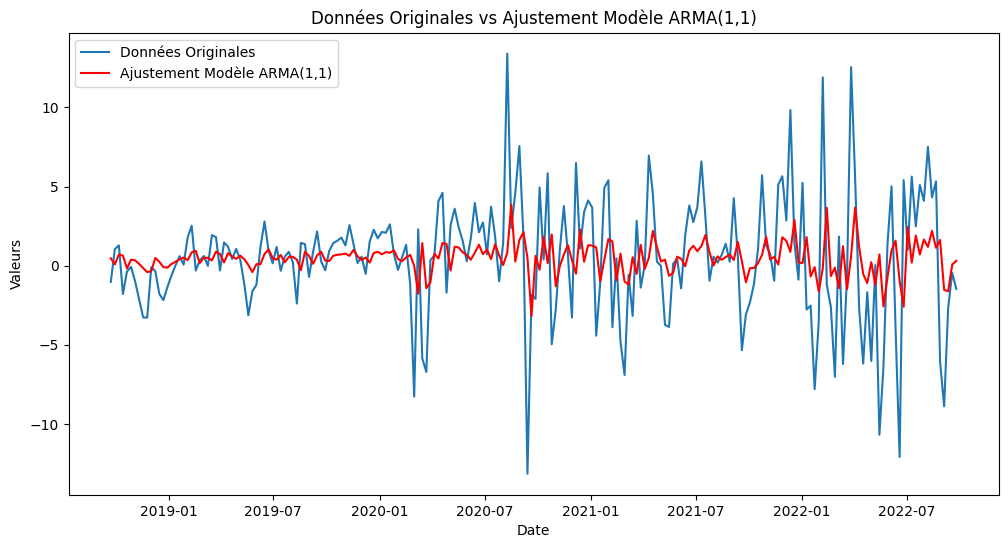

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Ajuster un modèle ARMA(1,1)
model_arma = ARIMA(train_df, order=(1, 0, 1))
results_arma = model_arma.fit()

# Afficher le résumé du modèle
print(results_arma.summary())

# Récupérer les ajustements du modèle
fitted_values_arma = results_arma.fittedvalues

# Créer le graphique des données et de l'ajustement
plt.figure(figsize=(12, 6))
plt.plot(train_df, label='Données Originales')
plt.plot(fitted_values_arma, color='red', label='Ajustement Modèle ARMA(1,1)')
plt.title('Données Originales vs Ajustement Modèle ARMA(1,1)')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()


Autocorrelation residus MA


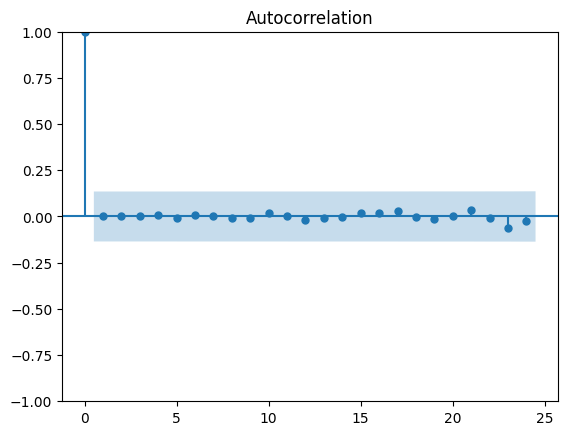

Autocorrelation residus AR


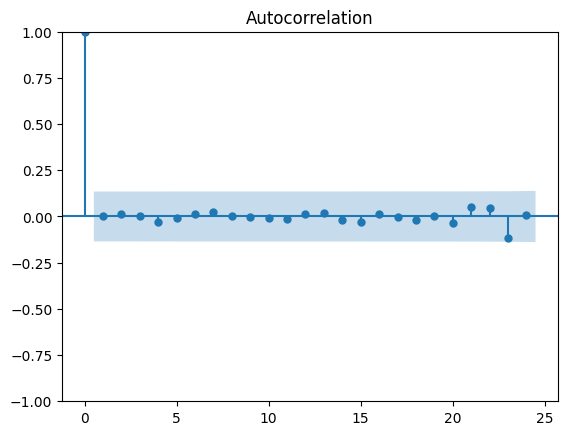

Autocorrelation residus ARMA


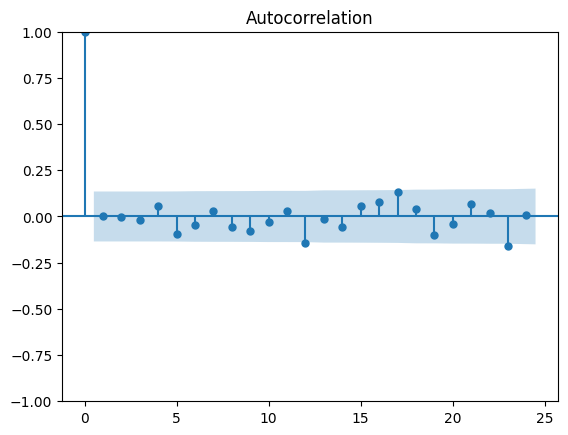

In [27]:
 # Vérifier les résidus MA
residus_ma = results_ma.resid
print("Autocorrelation residus MA")
plot_acf(residus_ma)
plt.show() 
# Vérifier les résidus AR
residus_ar = results_ar.resid
print("Autocorrelation residus AR")
plot_acf(residus_ar)
plt.show()
# Vérifier les résidus du modèle
residus_arma = results_arma.resid
print("Autocorrelation residus ARMA")
plot_acf(residus_arma)
plt.show()

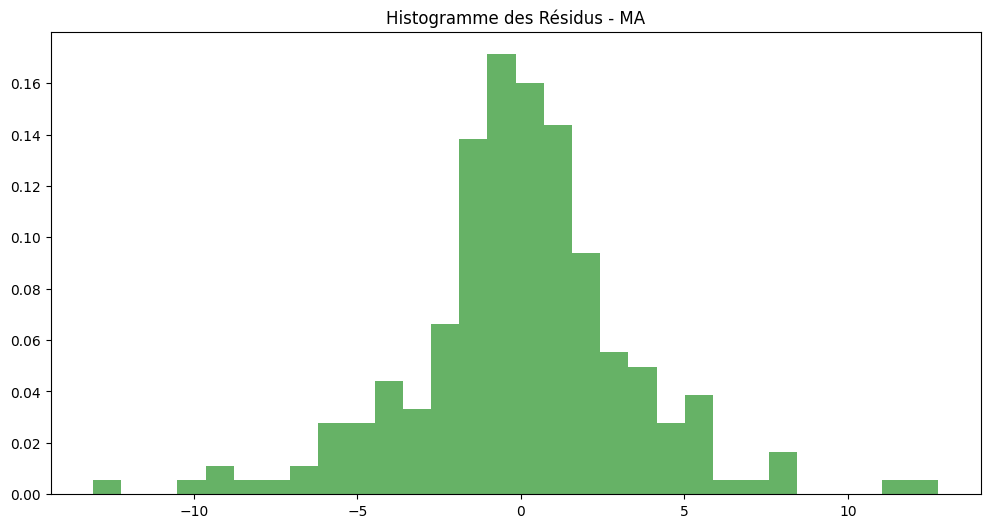

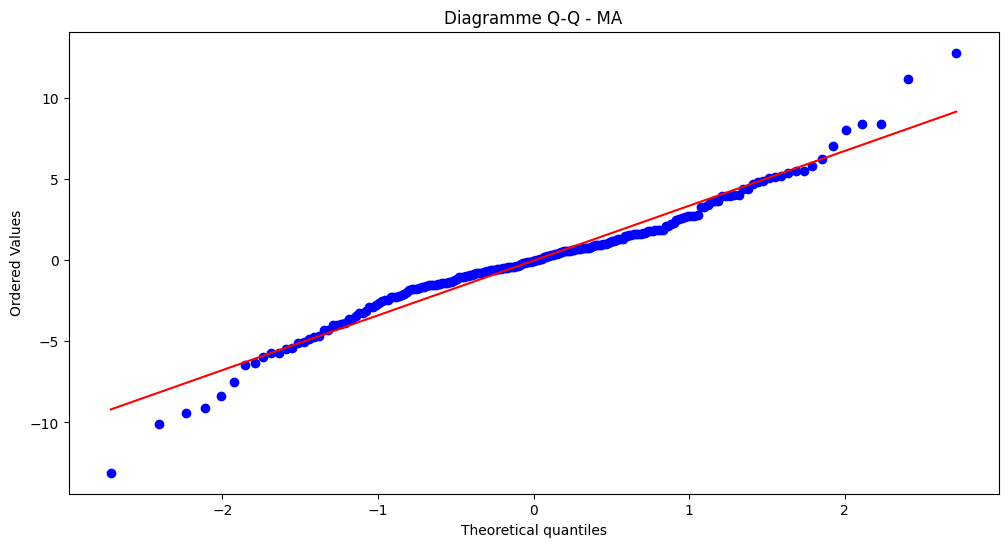

Résultats du Test de Shapiro-Wilk - MA : ShapiroResult(statistic=0.964352548122406, pvalue=3.866224142257124e-05)


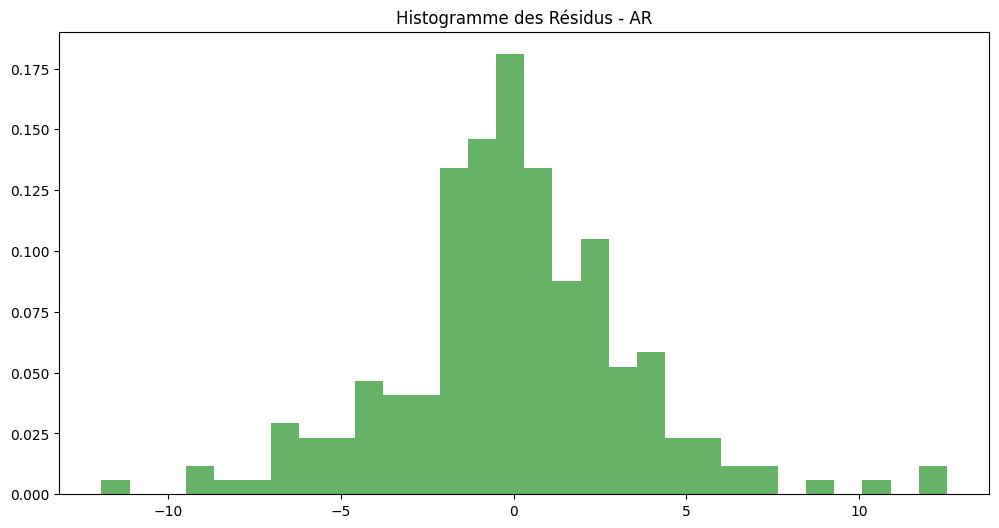

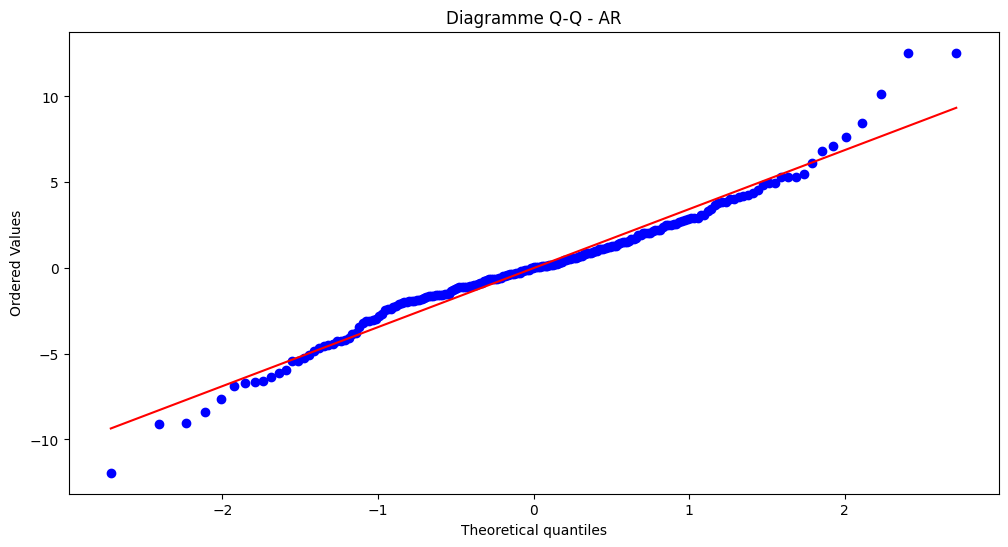

Résultats du Test de Shapiro-Wilk - AR : ShapiroResult(statistic=0.9701565504074097, pvalue=0.0001980667293537408)


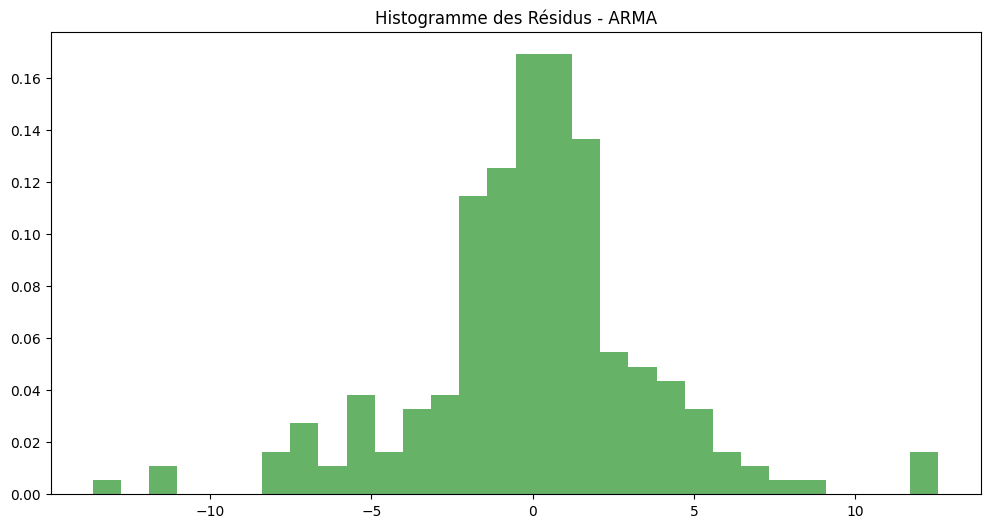

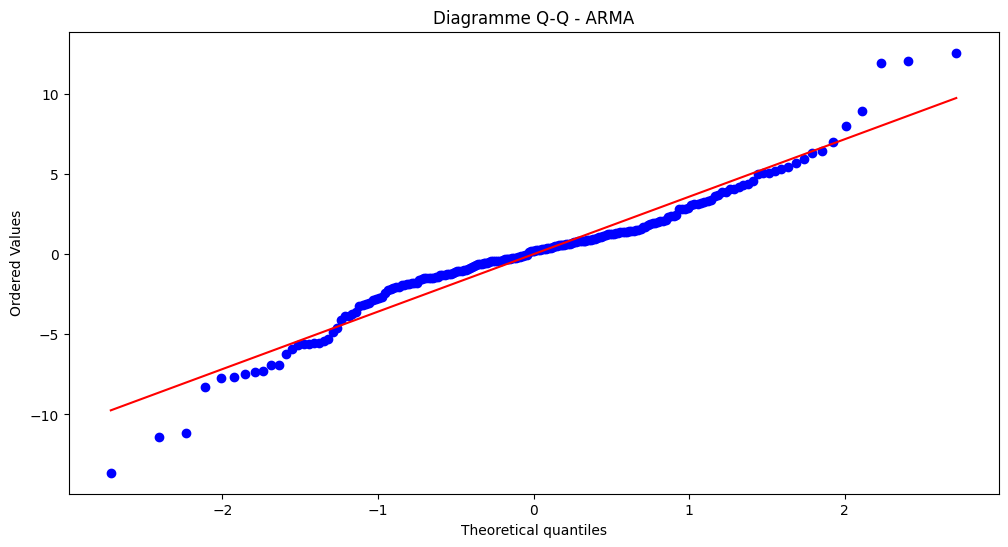

Résultats du Test de Shapiro-Wilk - ARMA : ShapiroResult(statistic=0.9516910910606384, pvalue=1.6310768842231482e-06)


In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Fonction pour vérifier la normalité des résidus
def check_residuals_normality(residus, title):
    # Histogramme
    plt.figure(figsize=(12, 6))
    plt.hist(residus, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Histogramme des Résidus - {title}')
    plt.show()

    # Diagramme Q-Q
    plt.figure(figsize=(12, 6))
    stats.probplot(residus, dist="norm", plot=plt)
    plt.title(f'Diagramme Q-Q - {title}')
    plt.show()

    # Test de Shapiro-Wilk
    shapiro_test = stats.shapiro(residus)
    print(f"Résultats du Test de Shapiro-Wilk - {title} : {shapiro_test}")

# Vérifier les résidus pour chaque modèle
check_residuals_normality(residus_ma, "MA")
check_residuals_normality(residus_ar, "AR")
check_residuals_normality(residus_arma, "ARMA")


In [29]:
pip install arch

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: arch in c:\users\ax2b\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages (6.2.0)



In [34]:
from arch import arch_model
print("####################*Résultats du modèle GARCH(1,1) pour les résidus esidus_ar")
# Ajustement du modèle GARCH(1,1) sur les résidus
garch_model_ar = arch_model(residus_ar, vol='Garch', p=1, q=1)
garch_result_ar = garch_model_ar.fit(disp='off')  # 'disp=off' pour éviter l'affichage des détails de l'optimisation
# Affichage du résumé du modèle GARCH
print(garch_result_ar.summary())
print("\n")

####################*Résultats du modèle GARCH(1,1) pour les résidus esidus_ar
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -532.246
Distribution:                  Normal   AIC:                           1072.49
Method:            Maximum Likelihood   BIC:                           1085.88
                                        No. Observations:                  210
Date:                Wed, Nov 29 2023   Df Residuals:                      209
Time:                        17:32:56   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
----------------------------------------------------------------

C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

In [ ]:
# Test de nullité du paramètre β pour les residus du modèle AR
p_value_beta_ar = garch_result_ar.pvalues['beta[1]']
print(f"P-value pour β dans le modèle GARCH(1,1) ajusté sur residus_ar: {p_value_beta_ar}")

# Interprétation de la p-value
if p_value_beta_ar < 0.05:
    print("Le paramètre β est statistiquement significatif (AR).")
else:
    print("Le paramètre β n'est pas statistiquement significatif(AR).")

P-value pour β dans le modèle GARCH(1,1) ajusté sur residus_ar: 6.966637391781532e-112
Le paramètre β est statistiquement significatif (AR).


In [ ]:
print("####################*Résultats du modèle GARCH(1,1) pour les résidus residus_ma" )
# Ajustement du modèle GARCH(1,1) sur les résidus
garch_model_ma = arch_model(residus_ma, vol='Garch', p=1, q=1)
garch_result_ma = garch_model_ma.fit(disp='off')  # 'disp=off' pour éviter l'affichage des détails de l'optimisation
# Affichage du résumé du modèle GARCH
print(garch_result_ma.summary())
print("\n")

####################*Résultats du modèle GARCH(1,1) pour les résidus residus_ma
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -528.269
Distribution:                  Normal   AIC:                           1064.54
Method:            Maximum Likelihood   BIC:                           1077.93
                                        No. Observations:                  210
Date:                Wed, Nov 29 2023   Df Residuals:                      209
Time:                        14:28:24   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
---------------------------------------------------------------

C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

In [ ]:
# Test de nullité du paramètre β
p_value_beta_ma = garch_result.pvalues['beta[1]']
print(f"P-value pour β dans le modèle GARCH(1,1) ajusté sur residus_ma: {p_value_beta_ma}")

# Interprétation de la p-value
if p_value_beta_ma < 0.05:
    print("Le paramètre β est statistiquement significatif (MA).")
else:
    print("Le paramètre β n'est pas statistiquement significatif (MA).")

P-value pour β dans le modèle GARCH(1,1) ajusté sur residus_ma: 7.9722039847e-61
Le paramètre β est statistiquement significatif (MA).


In [ ]:
print("####################*Résultats du modèle GARCH(1,1) pour les résidus residus_arma" )
# Ajustement du modèle GARCH(1,1) sur les résidus
garch_model_arma = arch_model(residus_arma, vol='Garch', p=1, q=1)
garch_result_arma = garch_model_arma.fit(disp='off')  # 'disp=off' pour éviter l'affichage des détails de l'optimisation
# Affichage du résumé du modèle GARCH
print(garch_result_arma.summary())
print("\n")

####################*Résultats du modèle GARCH(1,1) pour les résidus residus_arma
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -535.298
Distribution:                  Normal   AIC:                           1078.60
Method:            Maximum Likelihood   BIC:                           1091.99
                                        No. Observations:                  210
Date:                Wed, Nov 29 2023   Df Residuals:                      209
Time:                        14:28:26   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------

C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

In [ ]:
# Test de nullité du paramètre β
p_value_beta_arma = garch_result_arma.pvalues['beta[1]']
print(f"P-value pour β dans le modèle GARCH(1,1) ajusté sur residus_arma: {p_value_beta_arma}")

# Interprétation de la p-value
if p_value_beta_arma < 0.05:
    print("Le paramètre β est statistiquement significatif (ARMA).")
else:
    print("Le paramètre β n'est pas statistiquement significatif (ARMA).")

P-value pour β dans le modèle GARCH(1,1) ajusté sur residus_arma: 7.9722039847e-61
Le paramètre β est statistiquement significatif (ARMA).


In [ ]:
# Ajustement du modèle ARCH(1) sur les résidus
arch_model_arma = arch_model(residus_arma, vol='ARCH', p=1)
arch_result_arma = arch_model_arma.fit(disp='off')

# Affichage du résumé du modèle ARCH
print("####################*Résultats du modèle ARCH(1) pour les résidus residus_arma")
print(arch_result_arma.summary())
print("\n")

# Test de nullité du paramètre α
p_value_alpha = arch_result_arma.pvalues['alpha[1]']
print(f"P-value pour α dans le modèle ARCH(1) ajusté sur residus_arma: {p_value_alpha}")


####################*Résultats du modèle ARCH(1) pour les résidus residus_arma
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -569.531
Distribution:                  Normal   AIC:                           1145.06
Method:            Maximum Likelihood   BIC:                           1155.10
                                        No. Observations:                  210
Date:                Wed, Nov 29 2023   Df Residuals:                      209
Time:                        14:28:28   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
----------------------------------------------------------------

C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

In [ ]:
# Interprétation de la p-value
if p_value_alpha < 0.05:
    print("Le paramètre α est statistiquement significatif.")
else:
    print("Le paramètre α n'est pas statistiquement significatif.")

# Comparaison des statistiques de qualité d'ajustement
print("\nComparaison des statistiques de qualité d'ajustement :")
print(f"GARCH(1,1) AIC: {garch_result_arma.aic}, BIC: {garch_result_arma.bic}")
print(f"ARCH(1) AIC: {arch_result_arma.aic}, BIC: {arch_result_arma.bic}")


Le paramètre α n'est pas statistiquement significatif.

Comparaison des statistiques de qualité d'ajustement :
GARCH(1,1) AIC: 1078.596591908582, BIC: 1091.985022031452
ARCH(1) AIC: 1145.0610120310237, BIC: 1155.1023346231761


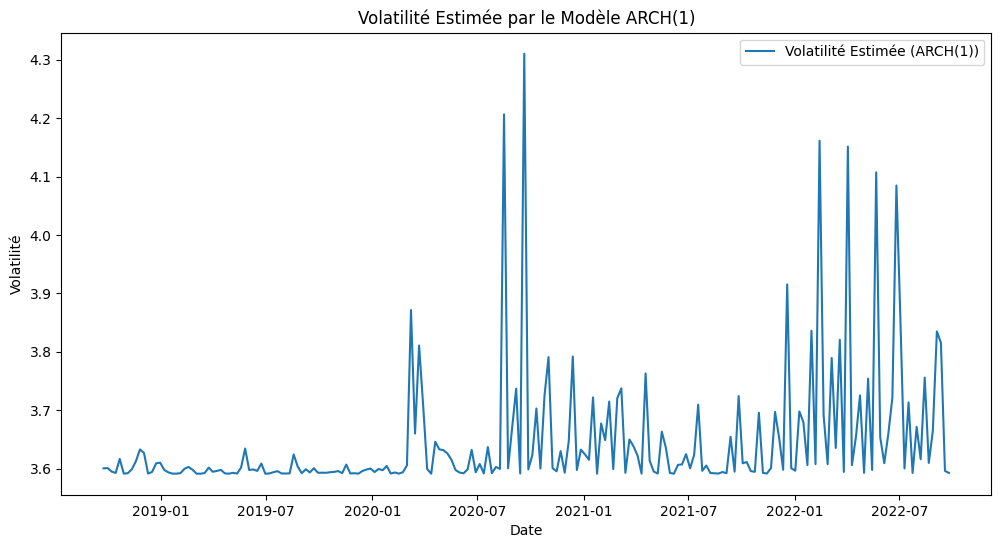

In [ ]:
# Récupération de la volatilité estimée par le modèle ARCH(1)
volatility = arch_result_arma.conditional_volatility

# Création du graphique de la volatilité
plt.figure(figsize=(12, 6))
plt.plot(volatility, label='Volatilité Estimée (ARCH(1))')
plt.title('Volatilité Estimée par le Modèle ARCH(1)')
plt.xlabel('Date')
plt.ylabel('Volatilité')
plt.legend()
plt.show()

In [35]:
# Ajustement du modèle ARMA
model_arma = ARIMA(train_df, order=(1, 0, 1))
results_arma = model_arma.fit()

# Prédictions pour les périodes futures (n_test étapes)
arma_forecast = results_arma.get_forecast(steps=n_test)
arma_pred_mean = arma_forecast.predicted_mean

# Les prédictions estimées par le modèle sont dans arma_pred_mean
print(arma_pred_mean)


2022-10-02   -0.015128
2022-10-09    0.441645
2022-10-16    0.467399
2022-10-23    0.468851
2022-10-30    0.468933
2022-11-06    0.468938
2022-11-13    0.468938
2022-11-20    0.468938
2022-11-27    0.468938
2022-12-04    0.468938
2022-12-11    0.468938
2022-12-18    0.468938
2022-12-25    0.468938
2023-01-01    0.468938
2023-01-08    0.468938
2023-01-15    0.468938
2023-01-22    0.468938
2023-01-29    0.468938
2023-02-05    0.468938
2023-02-12    0.468938
2023-02-19    0.468938
2023-02-26    0.468938
2023-03-05    0.468938
2023-03-12    0.468938
2023-03-19    0.468938
2023-03-26    0.468938
2023-04-02    0.468938
2023-04-09    0.468938
2023-04-16    0.468938
2023-04-23    0.468938
2023-04-30    0.468938
2023-05-07    0.468938
2023-05-14    0.468938
2023-05-21    0.468938
2023-05-28    0.468938
2023-06-04    0.468938
2023-06-11    0.468938
2023-06-18    0.468938
2023-06-25    0.468938
2023-07-02    0.468938
2023-07-09    0.468938
2023-07-16    0.468938
2023-07-23    0.468938
2023-07-30 

In [41]:
import numpy as np
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

# Assurez-vous que n_test est défini
n_test = int(len(apple_diff) * 0.20)

# Ajustement du modèle ARMA
model_arma = ARIMA(train_df, order=(1, 0, 1))
results_arma = model_arma.fit()

# Prédictions ARMA
arma_forecast = results_arma.get_forecast(steps=n_test)
arma_pred_mean = arma_forecast.predicted_mean

# Ajustement du modèle GARCH sur les résidus d'ARMA
residus_arma = results_arma.resid
model_garch = arch_model(residus_arma, vol='Garch', p=1, q=1)
garch_result = model_garch.fit(disp='off')

# Prévisions de volatilité GARCH
garch_forecast = garch_result.forecast(horizon=n_test)
predicted_volatility = np.sqrt(garch_forecast.variance.values[-1, :])

# Intervalles de prévision à 95%
lower_bounds = arma_pred_mean - 1.96 * predicted_volatility
upper_bounds = arma_pred_mean + 1.96 * predicted_volatility


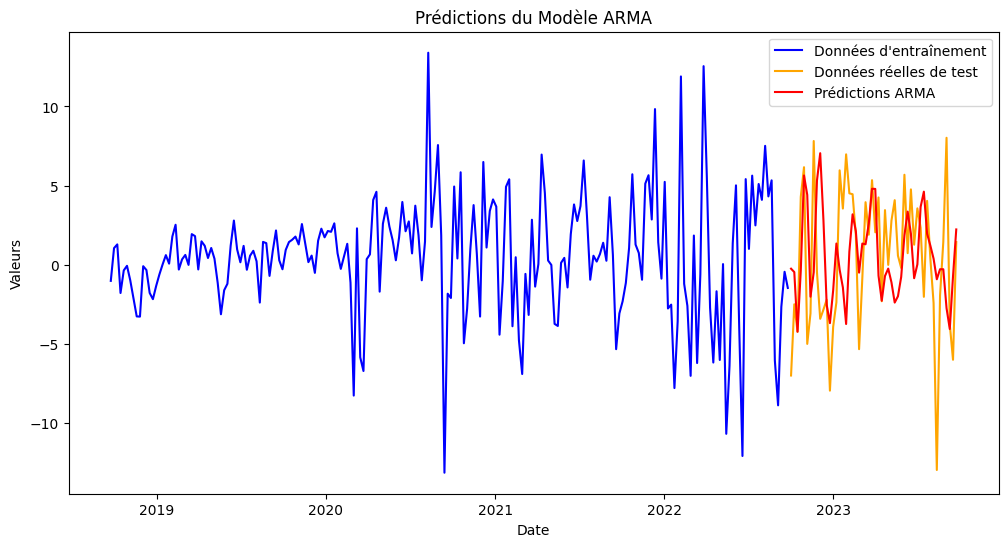

In [46]:
# Dates pour les prédictions (adaptez à votre série temporelle)
prediction_dates = test_df.index

# Créer le graphique
plt.figure(figsize=(12, 6))

# Données originales (entraînement et test)
plt.plot(train_df, label='Données d\'entraînement', color='blue')
plt.plot(test_df, label='Données réelles de test', color='orange')

# Prédictions ARMA
plt.plot(prediction_dates, arma_pred_mean, label='Prédictions ARMA', color='red')

plt.title('Prédictions du Modèle ARMA')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()


In [43]:
import numpy as np
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

n_test = int(len(apple_diff) * 0.20)
# Ajustement du modèle ARMA sur train_df
model_arma = ARIMA(train_df, order=(19, 0, 23))
results_arma = model_arma.fit()

# Prédictions ARMA pour n_test prochaines valeurs
arma_forecast = results_arma.get_forecast(steps=n_test)
arma_pred_mean = arma_forecast.predicted_mean

# Ajustement du modèle GARCH sur les résidus d'ARMA
residus_arma = results_arma.resid
model_garch = arch_model(residus_arma, vol='Garch', p=1, q=1)
garch_result = model_garch.fit(disp='off')

# Prévisions de volatilité GARCH pour n_test prochaines valeurs
garch_forecast = garch_result.forecast(horizon=n_test)
predicted_volatility = np.sqrt(garch_forecast.variance.values[-1, :])

# Intervalles de prévision à 95%
lower_bounds = arma_pred_mean - 1.96 * predicted_volatility
upper_bounds = arma_pred_mean + 1.96 * predicted_volatility


C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\AX2B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


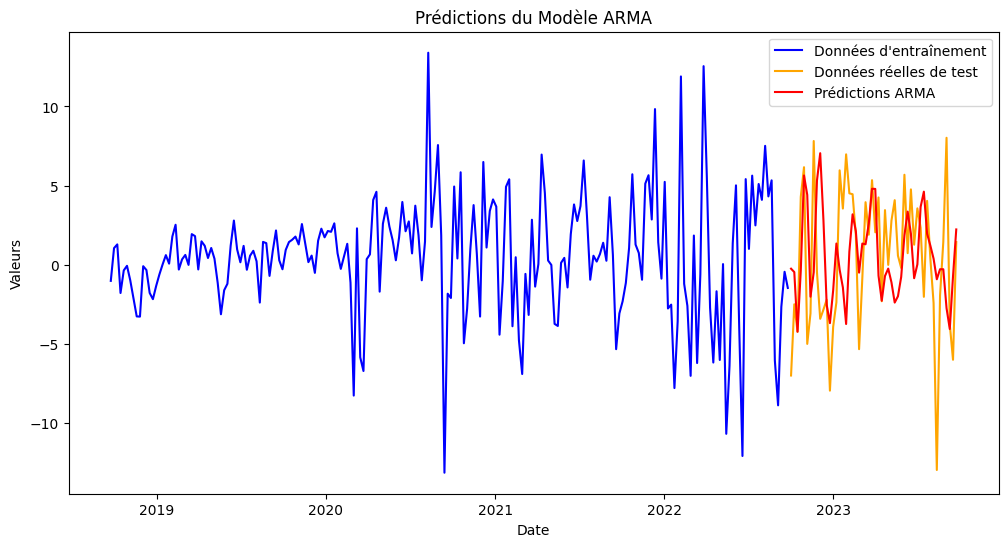

In [45]:
# Dates pour les prédictions (adaptez à votre série temporelle)
prediction_dates = test_df.index

# Créer le graphique
plt.figure(figsize=(12, 6))

# Données originales (entraînement et test)
plt.plot(train_df, label='Données d\'entraînement', color='blue')
plt.plot(test_df, label='Données réelles de test', color='orange')

# Prédictions ARMA
plt.plot(prediction_dates, arma_pred_mean, label='Prédictions ARMA', color='red')

plt.title('Prédictions du Modèle ARMA')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()
